In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [51]:
iris=load_iris()
x=iris.data
y=iris.target

In [53]:
e=OneHotEncoder(sparse_output=False)
y_encoder=e.fit_transform(y.reshape(-1,1))

In [55]:
s=StandardScaler()
x_scaled=s.fit_transform(x)

In [57]:
x_train,x_test,y_train,y_test=tts(x_scaled,y_encoder,test_size=0.2,random_state=42)

In [59]:
def create_mlp_model(optimizer='adam',activation='relu'):
    model=Sequential([
        Dense(16,input_dim=x_train.shape[1],activation=activation),
        Dense(8,activation=activation),
        Dense(y_train.shape[1],activation='softmax')
    ])
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [61]:
model_adam_relu=create_mlp_model(optimizer='adam',activation='relu')
history_adam_relu=model_adam_relu.fit(x_train,y_train,epochs=50,batch_size=16,verbose=0)
y_pred_adam=np.argmax(model_adam_relu(x_test),axis=1)
accuracy_model=accuracy_score(np.argmax(y_test,axis=1),y_pred_adam)

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model_sgd_tanh=create_mlp_model(optimizer='sgd',activation='tanh')
history_sgd_tanh=model_sgd_tanh.fit(x_train,y_train,epochs=50,batch_size=16,verbose=0)
y_pred_sgd=np.argmax(model_sgd_tanh(x_test),axis=1)
accuracy_sgd=accuracy_score(np.argmax(y_test,axis=1),y_pred_sgd)

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
print("Accuracy using Adam+ReLU is{:.2f}%".format(accuracy_model*100))
print("Accuracy using SGD and tanh is{:.2f}%".format(accuracy_sgd*100))

Accuracy using Adam+ReLU is93.33%
Accuracy using SGD and tanh is93.33%


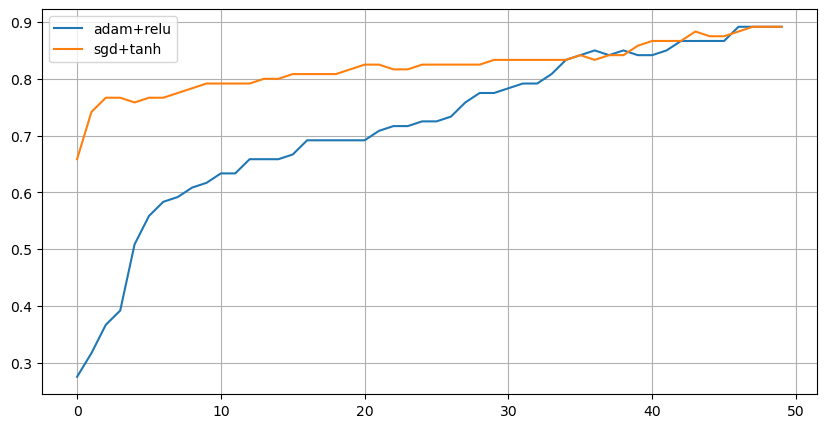

In [73]:
plt.figure(figsize=(10,5))
plt.plot(history_adam_relu.history['accuracy'],label='adam+relu')
plt.plot(history_sgd_tanh.history['accuracy'],label='sgd+tanh')
plt.legend()
plt.grid()
plt.show()

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Accuracy with Adam optimizer and ReLU activation: 91.11%
Accuracy with SGD optimizer and Tanh activation: 86.67%


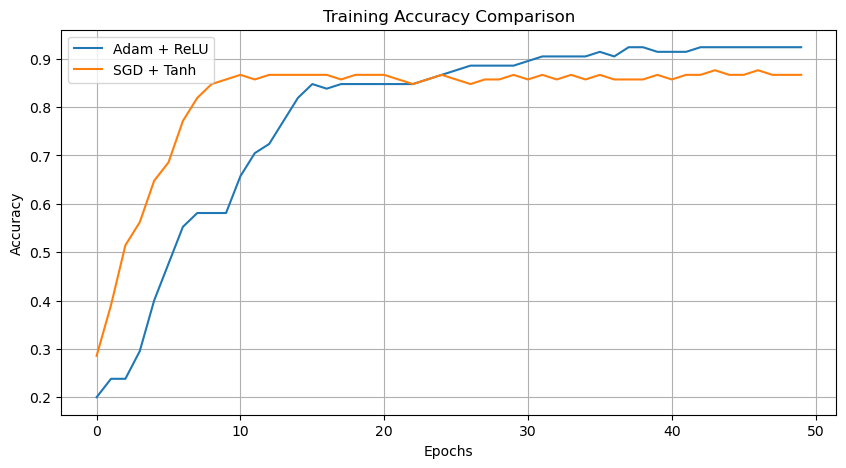

In [75]:
#10. Implement and demonstrate the two hidden layer multilayer perceptron neural network to any given dataset for classification. Apply two different optimizers or activation functions and compare the results.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42)

# Function to create an MLP model with custom optimizer and activation function
def create_mlp_model(optimizer='adam', activation='relu'):
    model = Sequential([
        Dense(16, input_dim=X_train.shape[1], activation=activation),
        Dense(8, activation=activation),
        Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model with Adam optimizer and ReLU activation
model_adam_relu = create_mlp_model(optimizer='adam', activation='relu')
history_adam_relu = model_adam_relu.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_adam_relu = np.argmax(model_adam_relu.predict(X_test), axis=1)
accuracy_adam_relu = accuracy_score(np.argmax(y_test, axis=1), y_pred_adam_relu)

# Train and evaluate the model with SGD optimizer and tanh activation
model_sgd_tanh = create_mlp_model(optimizer='sgd', activation='tanh')
history_sgd_tanh = model_sgd_tanh.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_sgd_tanh = np.argmax(model_sgd_tanh.predict(X_test), axis=1)
accuracy_sgd_tanh = accuracy_score(np.argmax(y_test, axis=1), y_pred_sgd_tanh)

# Print the results
print("Accuracy with Adam optimizer and ReLU activation: {:.2f}%".format(accuracy_adam_relu * 100))
print("Accuracy with SGD optimizer and Tanh activation: {:.2f}%".format(accuracy_sgd_tanh * 100))

# Plot training histories for comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history_adam_relu.history['accuracy'], label='Adam + ReLU')
plt.plot(history_sgd_tanh.history['accuracy'], label='SGD + Tanh')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
